In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
sns.set()

In [3]:
raw_data = pd.read_csv(r"C:\Users\Sparsh Mahajan\Downloads\2.01.+Admittance.csv")

In [4]:
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [5]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1 , 'No':0})

In [6]:
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


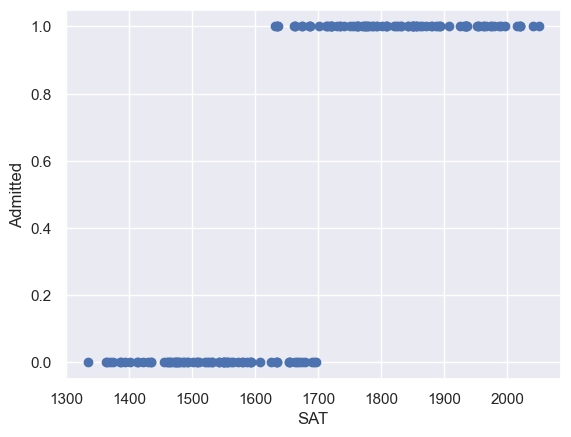

In [7]:
y = data['Admitted']
x= data['SAT']
plt.scatter(x , y)
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

In [8]:
 k = sm.add_constant(x)
reg_log= sm.Logit(y , k)
results_log =  reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [9]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Jun 2023   Pseudo R-squ.:                  0.7992
Time:                        00:01:31   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [10]:
result = sm.OLS(y , k).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           2.98e-43
Time:                        00:01:31   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.000      -3.652      -2.852
SAT            0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
data=pd.read_csv(r"C:\Users\Sparsh Mahajan\Downloads\2.02.+Binary+predictors.csv")
data
data_new = data.copy()
data_new['Admitted'] = data['Admitted'].map({'Yes':1 , 'No':0})
data_new['Gender'] = data['Gender'].map({'Male':0 , 'Female':1})
data_new

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


In [12]:
y = data_new['Admitted']
x1 = data_new[['SAT' ,'Gender']]

In [13]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Sat, 10 Jun 2023   Pseudo R-squ.:                  0.8249
Time:                        00:01:31   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [14]:
np.exp(1.9449)

6.992932526814459

In [15]:
results_log.predict()

array([2.24098643e-06, 9.98264069e-01, 9.99997581e-01, 2.25470272e-01,
       2.48392751e-02, 9.92249420e-01, 9.96544212e-01, 9.99963261e-01,
       9.99971204e-01, 1.48031753e-02, 9.99875812e-01, 9.99951185e-01,
       7.60867651e-01, 2.33384671e-06, 5.96283811e-01, 9.99834996e-01,
       1.14446654e-01, 1.18626448e-01, 5.05147726e-01, 9.99865308e-01,
       9.99999366e-01, 9.99997048e-01, 1.71939595e-04, 5.61635704e-03,
       9.68663798e-01, 9.99644611e-01, 4.84851641e-01, 9.91962775e-01,
       9.99828160e-01, 9.94609023e-01, 1.15028367e-04, 8.32585363e-01,
       2.47449367e-01, 9.99998840e-01, 9.98847293e-01, 9.99372736e-01,
       3.12716933e-01, 9.99932453e-01, 2.32639633e-01, 5.29744519e-05,
       1.95739604e-02, 4.54521689e-01, 9.99956956e-01, 2.97763113e-06,
       9.94178832e-01, 1.77714430e-05, 9.93914956e-01, 2.29360536e-04,
       3.30501192e-04, 6.89914934e-03, 4.24966754e-03, 9.99999657e-01,
       9.23952460e-01, 2.28569785e-02, 9.99994550e-01, 5.47478329e-06,
      

In [17]:
np.array(data_new['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [22]:
summary = results_log.pred_table()
summary

array([[69.,  5.],
       [ 4., 90.]])

In [23]:
cm = np.array(summary)
acc_train = (summary[0 , 0]+summary[1 , 1])/summary.sum()
acc_train

0.9464285714285714